<a href="https://colab.research.google.com/github/mhRumi/Machine-Learning-Lab/blob/main/Rumi_2017831023_CNN_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/assingnment'
# !unzip CNN_dataset.zip

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

dir_path = '/content/drive/MyDrive/assingnment/CNN_dataset/'

train_split = 0.75
val_split = 0.1
test_split = 0.15

images = []
labels = []

class_names = ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [ ]:
for i, class_name in enumerate(class_names):
  class_path = os.path.join(dir_path, class_name)
  for img_name in os.listdir(class_path):
      img_path = os.path.join(class_path, img_name)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (64, 64))
      images.append(img)
      labels.append(i)

In [ ]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=test_split, stratify=labels, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_split/(train_split-val_split),
    stratify=y_train, random_state=42)

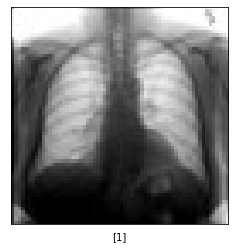

In [ ]:
import matplotlib.pyplot as plt

plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[4]])
plt.imshow(x_train[4],cmap=plt.cm.binary)

In [ ]:
x_train /= 255.
x_val /= 255.
x_test /= 255.

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(-1,64, 64,1) #Reshape for CNN 
x_test = x_test.reshape(-1,64, 64, 1)
x_train.shape

(35961, 64, 64, 1)

In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
420/420 [==============================] - 19s 18ms/step - loss: 0.7425 - accuracy: 0.6792 - val_loss: 0.0923 - val_accuracy: 0.9816
Epoch 2/10
420/420 [==============================] - 7s 16ms/step - loss: 0.0807 - accuracy: 0.9772 - val_loss: 0.0437 - val_accuracy: 0.9912
Epoch 3/10
420/420 [==============================] - 6s 15ms/step - loss: 0.0703 - accuracy: 0.9788 - val_loss: 0.1677 - val_accuracy: 0.9345
Epoch 4/10
420/420 [==============================] - 7s 16ms/step - loss: 0.0648 - accuracy: 0.9816 - val_loss: 0.0374 - val_accuracy: 0.9923
Epoch 5/10
420/420 [==============================] - 6s 14ms/step - loss: 0.0544 - accuracy: 0.9830 - val_loss: 0.0293 - val_accuracy: 0.9930
Epoch 6/10
420/420 [==============================] - 6s 15ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 0.0168 - val_accuracy: 0.9947
Epoch 7/10
420/420 [==============================] - 6s 14ms/step - loss: 0.1067 - accuracy: 0.9741 - val_loss: 0.0194 - val_accuracy: 0.995

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9958666563034058


In [ ]:
predictions = model.predict(x_test)
predictions[0]

235/235 [==============================] - 1s 2ms/step


array([5.2034168e-21, 9.9999988e-01, 1.5585046e-20, 1.2754009e-07,
       9.4593589e-24], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
x_test = x_test.reshape(-1, 64, 64)
x_test.shape

(7500, 64, 64)

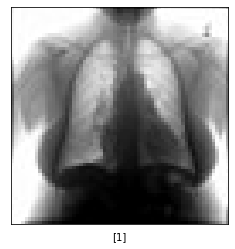

In [ ]:
plt.xticks([])
plt.yticks([])
plt.xlabel([y_test[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)

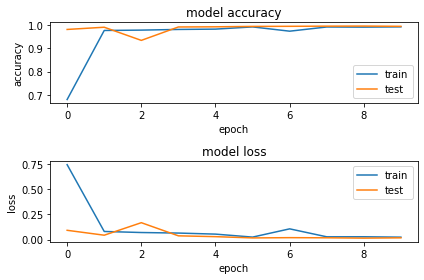

In [ ]:
import os
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()